# **Description**

Notebook based on dataset of video game sales as at December 2016 from kaggle.com. \\
Link:
https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

# **Setup**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings

In [3]:
warnings.filterwarnings("ignore")
#matplotlib
plt.style.use('Solarize_Light2')
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["tomato","gold","yellowgreen", "darkturquoise", "dodgerblue", "mediumorchid"])
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["tomato", "darkturquoise"]) 

## Importing the data from three files

In [ ]:
# main file
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv', sep=',')
# additional data
dataPS4 = pd.read_csv('PS4_GamesSales.csv', sep=',', encoding='unicode_escape')
dataXbox = pd.read_csv('XboxOne_GameSales.csv', sep=',', encoding='unicode_escape')

data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataPS4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [ ]:
dataXbox

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


## Merging them into one DataFrame

In [ ]:
# dropping the index column
dataXbox = dataXbox.drop('Pos', axis=1)

# adding information about the platform
dataPS4['Platform'] = 'PS4'
dataXbox['Platform'] = 'XOne'

In [ ]:
additionalData = pd.concat([dataPS4, dataXbox])

In [ ]:
print(data.columns)
print(additionalData.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global', 'Platform'],
      dtype='object')


In [ ]:
# changing column names to match columns in the main DataFrame
additionalData.rename(
    columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America' : 'NA_Sales', 'Europe' : 'EU_Sales',
               'Japan' : 'JP_Sales', 'Rest of World' : 'Other_Sales', 'Global' : 'Global_Sales' }, 
    inplace = True)

In [ ]:
data = pd.concat([data, additionalData])

In [ ]:
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Biomutant,XOne,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
609,Biomutant,XOne,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
610,de Blob,XOne,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
611,Outcast: Second Contact,XOne,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# saving merged dataFrame
data.to_csv("merged_data.csv", index=False)

# **Preprocessing**

In [ ]:
data = pd.read_csv('merged_data.csv', sep=',')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18361,Biomutant,XOne,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18362,Biomutant,XOne,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18363,de Blob,XOne,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
18364,Outcast: Second Contact,XOne,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def showMissing(dataFrame):
  percentMissing = []
  for column in dataFrame.columns:
    missing = dataFrame[column].isnull().sum()
    percentMissing.append( [ missing / dataFrame.shape[0], missing ])

  return pd.DataFrame(index=dataFrame.columns, data=percentMissing, columns=['% missing', 'nr of missing'])

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000109,2
Platform,0.000000,0
Year_of_Release,0.031907,586
Genre,0.000109,2
Publisher,0.020200,371
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## Name

In [ ]:
# removing rows without Name value
data = data[data.Name.notnull()]

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.031910,586
Genre,0.000000,0
Publisher,0.020203,371
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## Platform / Genre / Publisher / Developer / Year of Release

Function completing *columnToComplete* with value from other row with matching value from *columnToCompare*:

In [ ]:
def complete(columnToComplete, columnToCompare):
  missing = data[ data[columnToComplete].isnull() ]
  for i in missing.index:
    compareValue = data[columnToCompare][i]
    instances = data[ data[columnToCompare] == compareValue ]
    instances = instances[ instances[columnToComplete].notnull() ]

    if instances.shape[0] > 0:
      data[columnToComplete][i] = instances.iloc[0][columnToComplete]

In [ ]:
# completing Publisher and Year of Release
complete('Publisher', 'Name')
complete('Year_of_Release', 'Name')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.023797,437
Genre,0.000000,0
Publisher,0.018460,339
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


In [ ]:
# removing the rest of rows with missing data in these columns
data = data[ data.Publisher.notnull() ]
data = data[ data.Year_of_Release.notnull() ]

In [ ]:
data.shape

(17895, 16)

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.000000,0
Genre,0.000000,0
Publisher,0.000000,0
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


## Sales


Sales in millions of sold units \\


**kolumny:** \\
NA_Sales - North America \\
EU_Sales - Europe \\
JP_Sales - Japan \\
Other_Sales \\
Global_Sales 

In [ ]:
# droping Global_Sales as it is a sum of other sales columns
#data = data.drop('Global_Sales', axis=1)

## Reviews

Data from Metacritic. There are missing observations as Metacritic only covers a subset of the platforms.

Critic_Score - **weighted** average of critic scores, 0-100 \\
Critic_Count - number of critics who gave a score \\
User_Score - 0-1 \\
User_Count - number of users who gave a score

| General Meaning of Score |	Game Score |
| :-: | :-: |
| Universal Acclaim	| 90 - 100 |
| Generally Favorable Reviews	| 75 - 89 |
| Mixed or Average Reviews | 50 - 74 |
| Generally Unfavorable Reviews |	20 - 49 |
| Overwhelming Dislike | 0 - 19 |


In [ ]:
# scaling Critic_Score to range [0, 1]
data['Critic_Score'] = data['Critic_Score']/100

# scaling User_Score to range [0, 1]
data['User_Score'] = data['User_Score']/10

## Ratings

Entertainment Software Rating Board (ESRB): \\

| shortcut | description | value in data |
| :-: |:-- | :-: |
| RP | Rating Pending | -1 |
| E | Everyone (before 1998 marked as K-A (kids to adults)) | 0 |
| EC | Early Childhood (not in use since 2018) | 1 |
| E10+ | Everyone 10+ | 2 |
| T | Teen | 3 |
| M | Mature | 4 |
| AO | Adults Only | 5 | 

In [ ]:
print(data['Rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [ ]:
# replacing rating K-A to E, because the are equivalent
data['Rating'] = data['Rating'].replace('K-A', 'E')

In [ ]:
# changing rating to numerical values
replacement = {
    'RP'    : -1,
    'E'     : 0,
    'EC'    : 1,
    'E10+'  : 2,
    'T'     : 3,
    'M'     : 4,
    'AO'    : 5
}

data['Rating'] = data['Rating'].replace(replacement)

## Splitting into two dataFrames

In [ ]:
showMissing(data)

,% missing,nr of missing
Name,0.000000,0
Platform,0.000000,0
Year_of_Release,0.000000,0
Genre,0.000000,0
Publisher,0.000000,0
NA_Sales,0.000000,0
EU_Sales,0.000000,0
JP_Sales,0.000000,0
Other_Sales,0.000000,0
Global_Sales,0.000000,0


Saving data with and without columns after Critic_Score separately.

In [ ]:
# data with more columns and less rows
columns = ['Rating', 'Developer', 'User_Count', 'User_Score', 'Critic_Count', 'Critic_Score']
dataExtended = data
for column in columns:
  dataExtended = dataExtended[ dataExtended[column].notnull() ]

showMissing(dataExtended)

,% missing,nr of missing
Name,0.0,0
Platform,0.0,0
Year_of_Release,0.0,0
Genre,0.0,0
Publisher,0.0,0
NA_Sales,0.0,0
EU_Sales,0.0,0
JP_Sales,0.0,0
Other_Sales,0.0,0
Global_Sales,0.0,0


In [ ]:
dataExtended.shape

(6899, 16)

In [ ]:
# data with more rows and less columns
dataCut = data[ ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'] ]

showMissing(dataCut)

,% missing,nr of missing
Name,0.0,0
Platform,0.0,0
Year_of_Release,0.0,0
Genre,0.0,0
Publisher,0.0,0
NA_Sales,0.0,0
EU_Sales,0.0,0
JP_Sales,0.0,0
Other_Sales,0.0,0
Global_Sales,0.0,0


In [ ]:
dataCut.shape

(17895, 10)

## Saving data

In [ ]:
# saving data
dataExtended.to_csv("processedDataExtended.csv", index=False)
dataCut.to_csv("processedDataCut.csv", index=False)

# **Data Analysis**

In [ ]:
dataExt = pd.read_csv('processedDataExtended.csv', sep=',', dtype = { column : 'int16' for column in [ 'Year_of_Release', 'Rating', 'Critic_Count', 'User_Count'] })
dataCut = pd.read_csv('processedDataCut.csv', sep=',', dtype = { 'Year_of_Release' : 'int16'})

In [ ]:
dataExt.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
dataCut.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

## **Cathegorical data**

Distribution of games in dataset by genre:

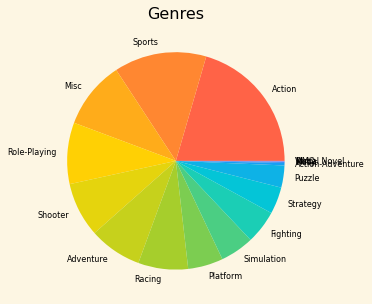

In [ ]:
dataCut['Genre'].value_counts().plot(kind='pie', title='Genres', ylabel = '', colormap=colormap, textprops={'fontsize': 8}, figsize=(5, 5))
plt.show()

Distribution by platform:

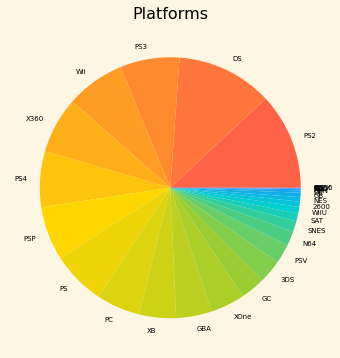

In [ ]:
dataCut['Platform'].value_counts().plot(kind='pie', title='Platforms', ylabel = '', colormap=colormap, textprops={'fontsize': 7}, figsize=(6, 6))
plt.show()

### Correlations between cathegorical and numerical data:

Sales in North America, Europe, Japan and rest of the world grouped by genre:

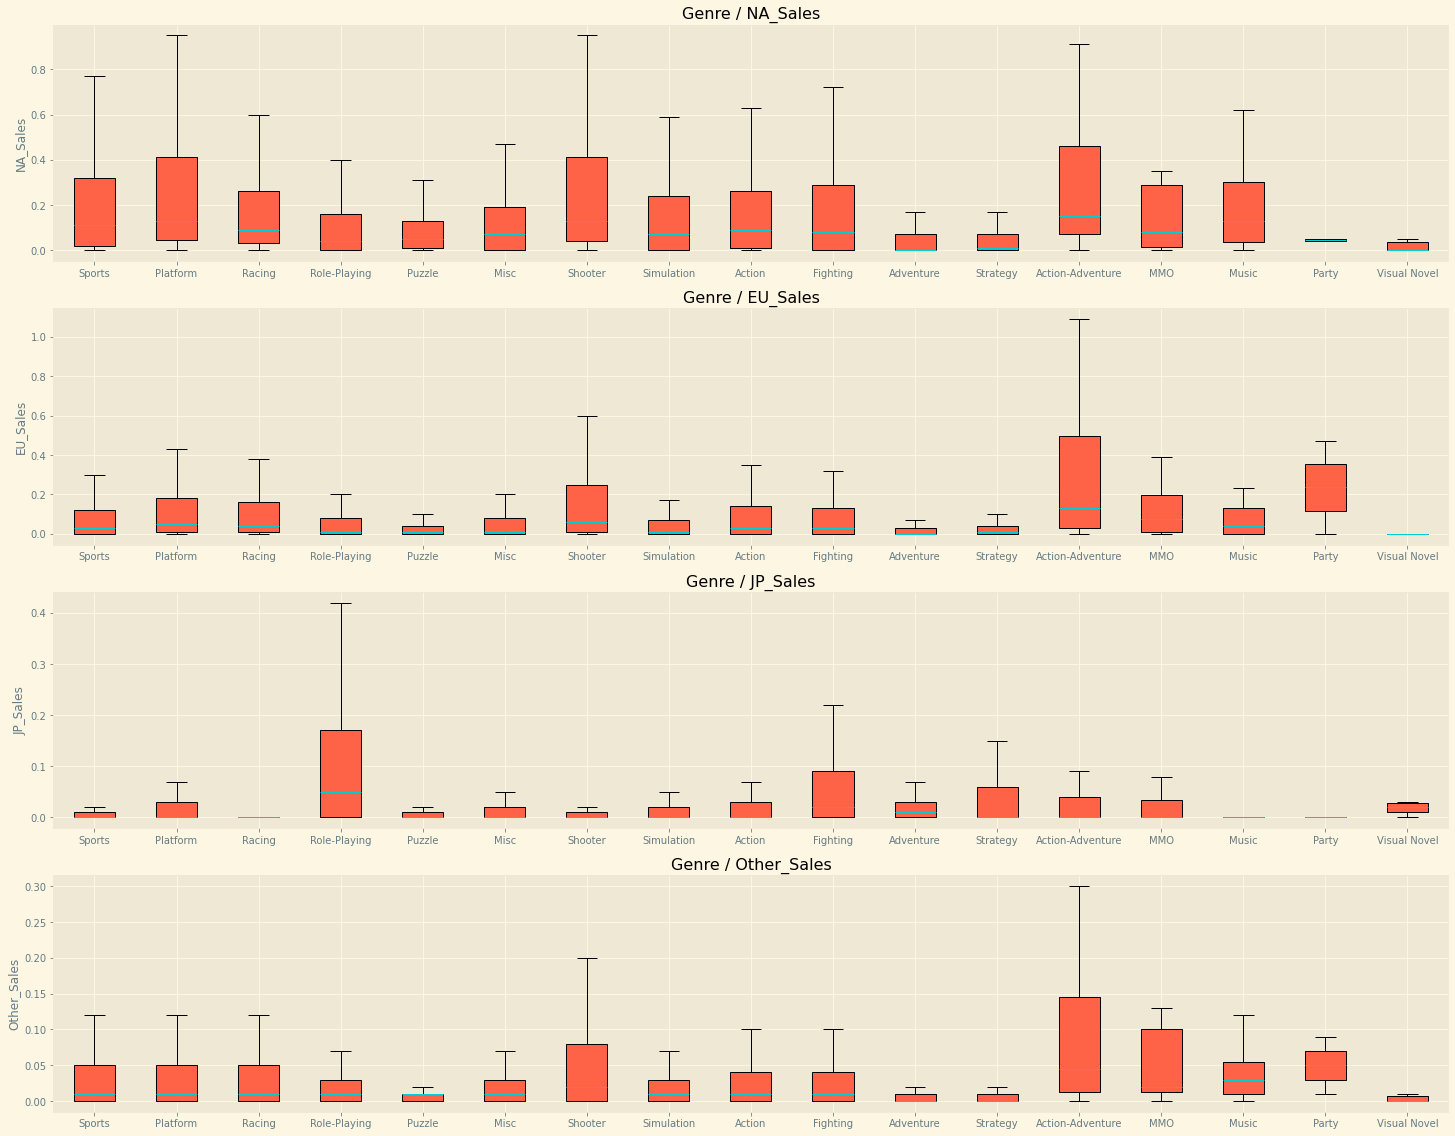

In [ ]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(4, 1, figsize=(25, 20))
for col, ax in zip(salesCols, axs.reshape(-1)):
  ax.boxplot( [dataCut[dataCut.Genre==genre][col] for genre in dataCut.Genre.unique()] , vert=True, patch_artist=True, labels=dataCut.Genre.unique(), showfliers=False) 
  ax.set_title("Genre / " +col)
  ax.set_ylabel(col)
plt.show()

Sales grouped by platform:

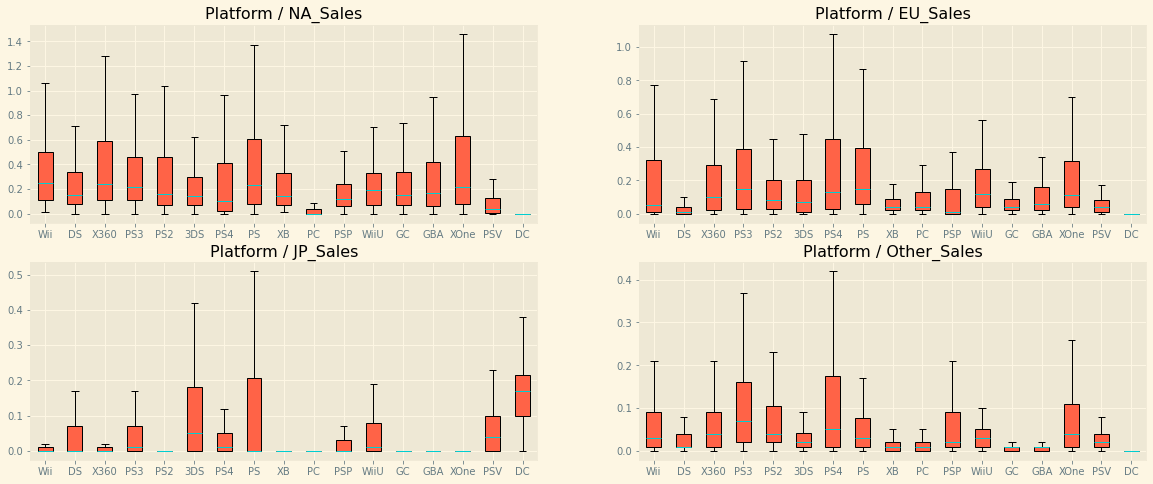

In [ ]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(2, 2, figsize=(20, 8))
for col, ax in zip(salesCols, axs.reshape(-1)):
  ax.boxplot( [dataExt[dataExt.Platform==platform][col] for platform in dataExt.Platform.unique()] , vert=True, patch_artist=True, labels=dataExt.Platform.unique(), showfliers=False) 
  ax.set_title('Platform / '+col)
plt.show()

Total amount of sales of 10 publishers who made best selling games:

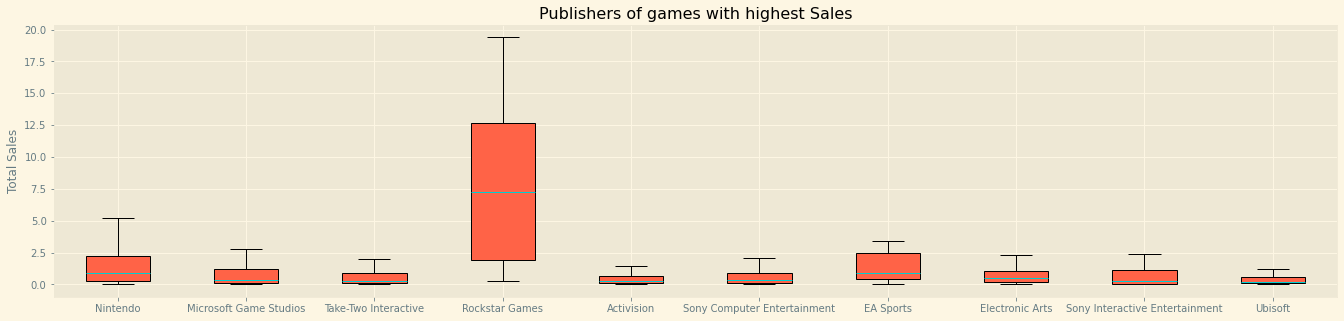

In [ ]:
publishers = dataCut.Publisher.unique()
m = { 
    'Publisher' : publishers, 
    'Max' : [dataCut[dataCut.Publisher==publisher][salesCols].sum(axis=1).max() for publisher in publishers]
     }
m = pd.DataFrame(m)

publishers = m.nlargest(10, 'Max')['Publisher']

plt.figure(figsize=(23, 5))
plt.boxplot( [dataCut[dataCut.Publisher==p][salesCols].sum(axis=1) for p in publishers] , vert=True, patch_artist=True, labels=publishers, showfliers=False) 
plt.title('Publishers of games with highest Sales')
plt.ylabel('Total Sales')
plt.show()

Critic Score of 10 publishers of games with highest Critic Score:

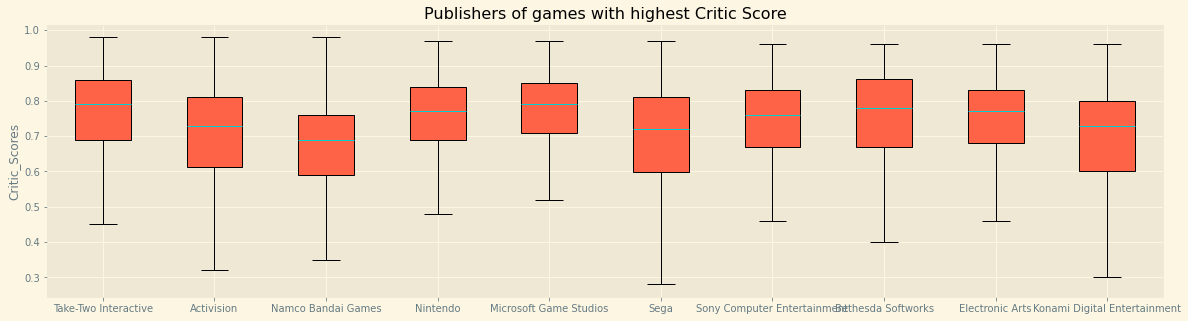

In [ ]:
publishers = dataExt.Publisher.unique()
m = { 
    'Publisher' : publishers, 
    'Max' : [dataExt[dataExt.Publisher==publisher]['Critic_Score'].max() for publisher in publishers]
     }
m = pd.DataFrame(m)

publishers = m.nlargest(10, 'Max')['Publisher']

plt.figure(figsize=(20, 5))
plt.boxplot( [dataExt[dataExt.Publisher==p]['Critic_Score'] for p in publishers] , vert=True, patch_artist=True, labels=publishers, showfliers=False) 
plt.title('Publishers of games with highest Critic Score')
plt.ylabel('Critic_Scores')
plt.show()

## **Numerical data**

In [ ]:
numericColumns = ['Year_of_Release', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Rating']

Distribution of games by rating:

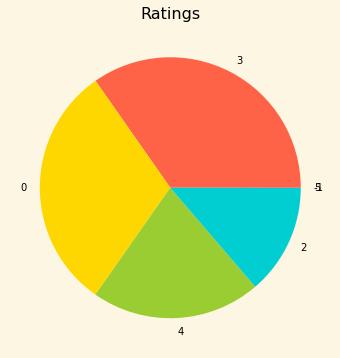

In [ ]:
dataExt['Rating'].value_counts().plot(kind='pie', title='Ratings', ylabel = '', colormap=colormap, textprops={'fontsize': 10}, figsize=(6, 6))
plt.show()

Drawing pairplot to look for correlations:

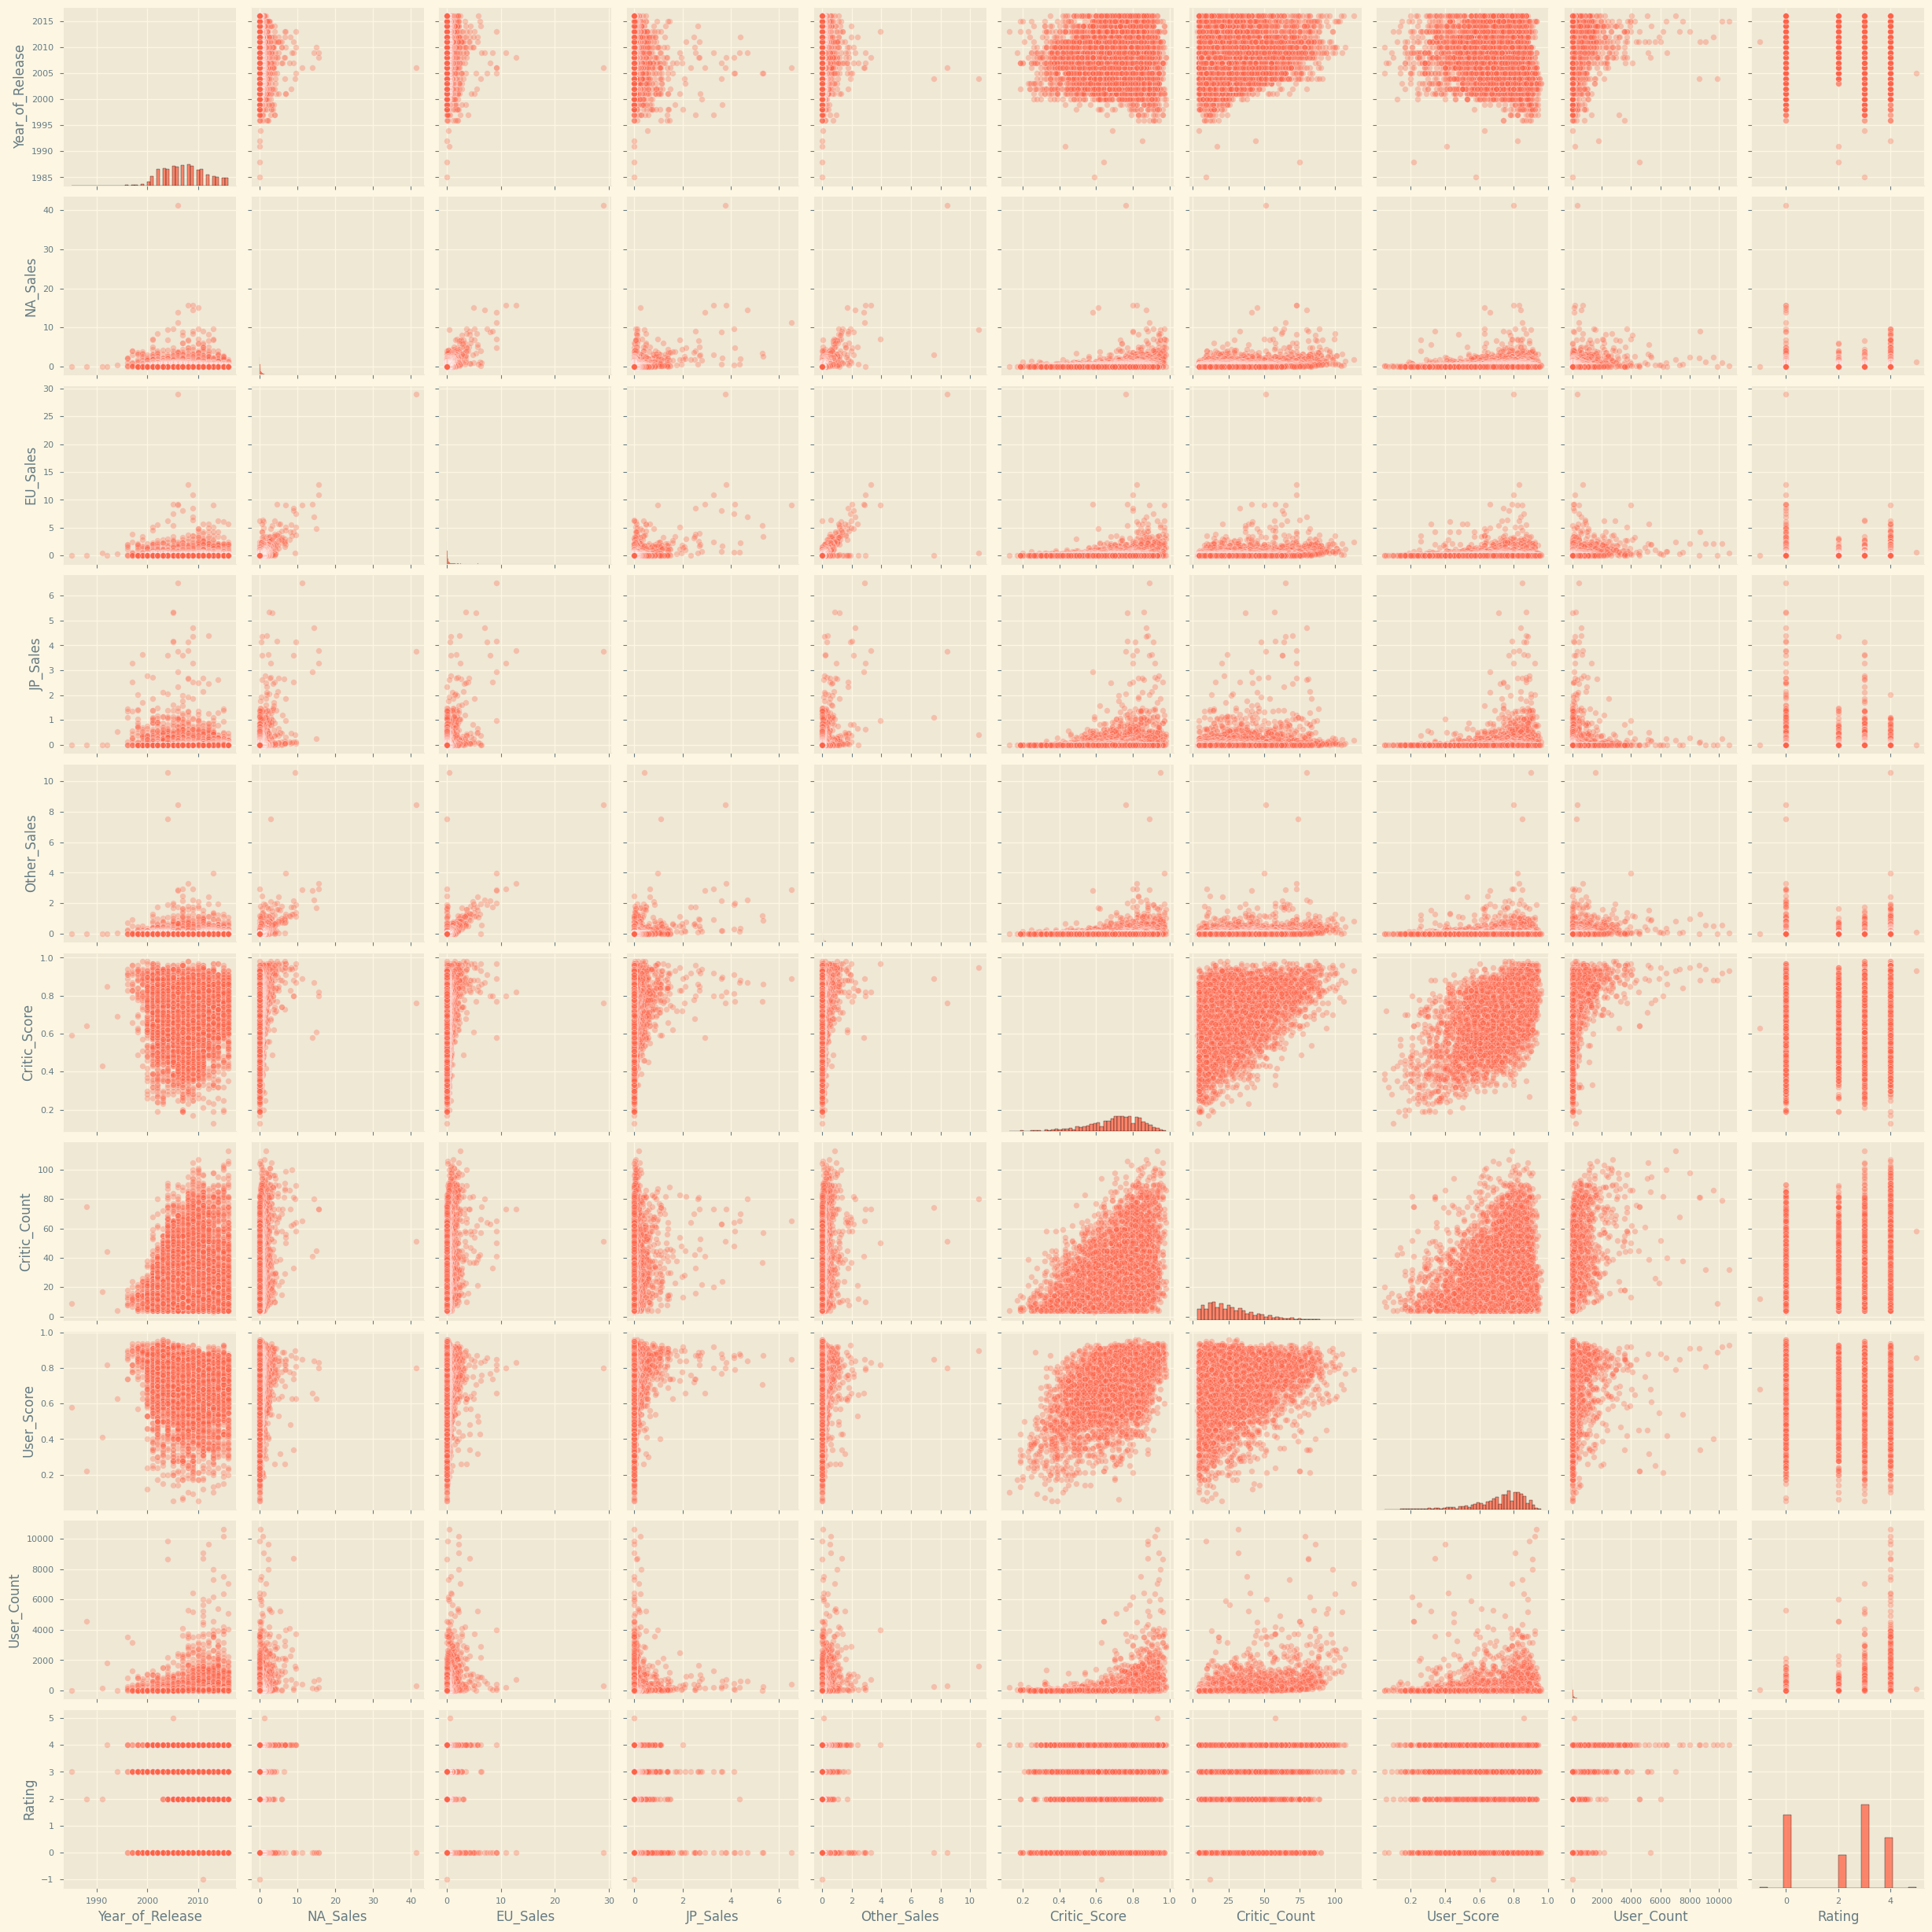

In [ ]:
sns.pairplot( dataExt[numericColumns],  plot_kws=dict(alpha=0.3))
plt.show()

### **Observations with additional visualisation** 

1. Number of users who left a review is significantly bigger for games with rating 4 (which here is code for rating M - Mature).

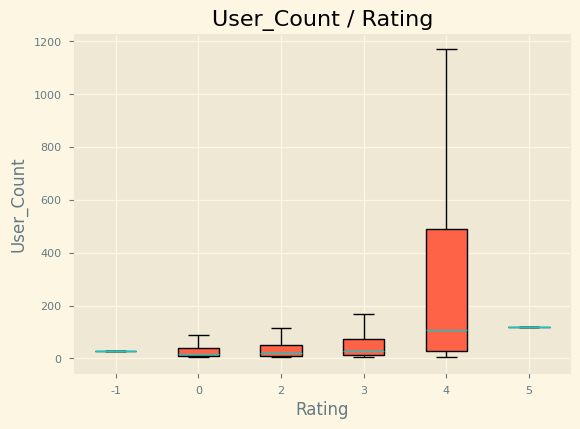

In [ ]:
ratings = dataExt.Rating.unique()
ratings.sort()
plt.boxplot( [dataExt[dataExt.Rating==r]['User_Count'] for r in ratings] , vert=True, patch_artist=True, labels=ratings, showfliers=False) 
plt.title('User_Count / Rating')
plt.ylabel('User_Count')
plt.xlabel('Rating')
plt.show()

2. Number of reviews of both critics and users seem to be increasing over time. Reviews of critics dropped a little bit around 2007 and 2013, whereas user reviews are lower in the last two years.

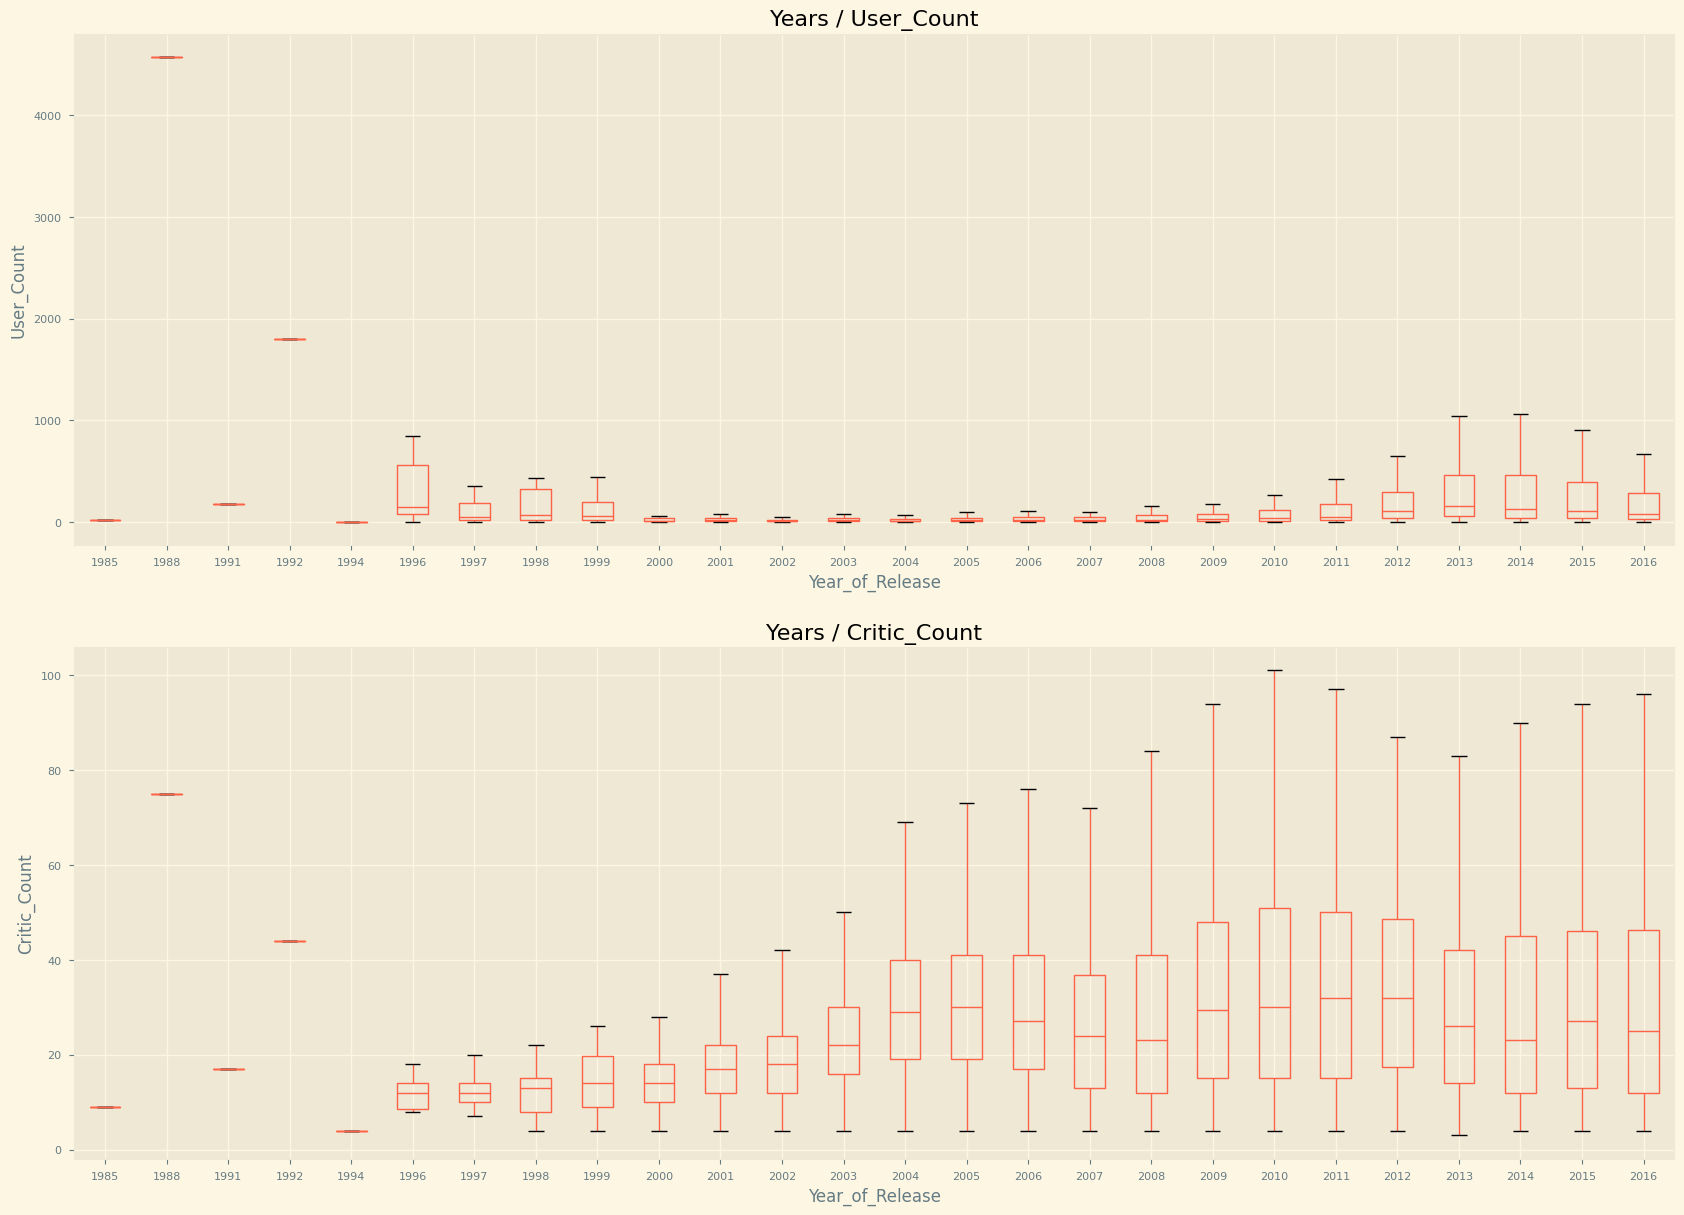

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 15))
cols = ['User_Count', 'Critic_Count']
for ax, col in zip(axs, cols):
  dataExt.boxplot(col, 'Year_of_Release', ax=ax, showfliers=False)
  ax.get_figure().suptitle('')
  ax.set_title('Years / '+col)
  ax.set_ylabel(col)
plt.show()

Before 1996 plot shows only medians due to the fact that there are only few of games from that time.

In [ ]:
dataExt[dataExt.Year_of_Release < 1996]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1009,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,0.39,0.26,0.53,0.08,0.69,4,0.63,4,Tamsoft,3
2550,Sonic the Hedgehog,PS3,1991,Platform,Sega,0.00,0.48,0.00,0.00,0.43,17,0.41,176,Sonic Team,2
6470,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.00,0.01,0.59,9,0.58,19,"Viva Media, Viva Media, LLC",3
6499,Doom,PC,1992,Shooter,id Software,0.02,0.00,0.00,0.00,0.85,44,0.82,1796,id Software,4
6501,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.00,0.01,0.64,75,0.22,4572,Maxis,2


SimCity from 1988 is especially visible in the User_Count plot with value 4572. After 1996 there are also games with higher values but they do not have such impact on the way the plot above looks. They can become visible after showing outliers on the plot:

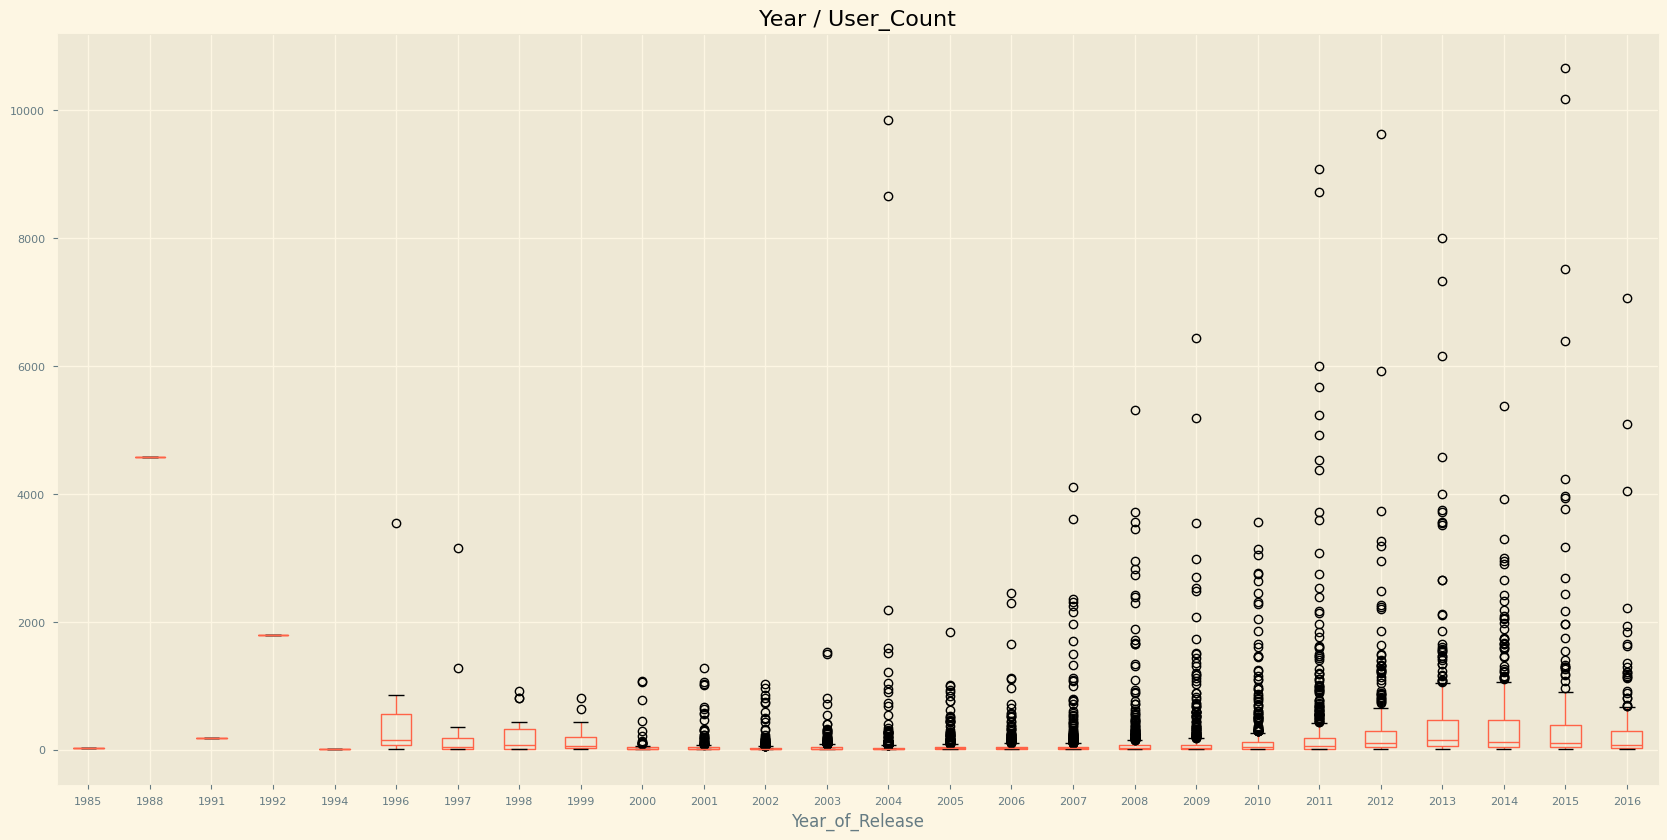

In [ ]:
dataExt.boxplot('User_Count', 'Year_of_Release', showfliers=True, figsize=(20, 10))
plt.suptitle('')
plt.title('Year / User_Count')
plt.show()

3. Games most reviewed by users have rather low sales in Japan, whereas those with high sales in Japan are less reviewed.

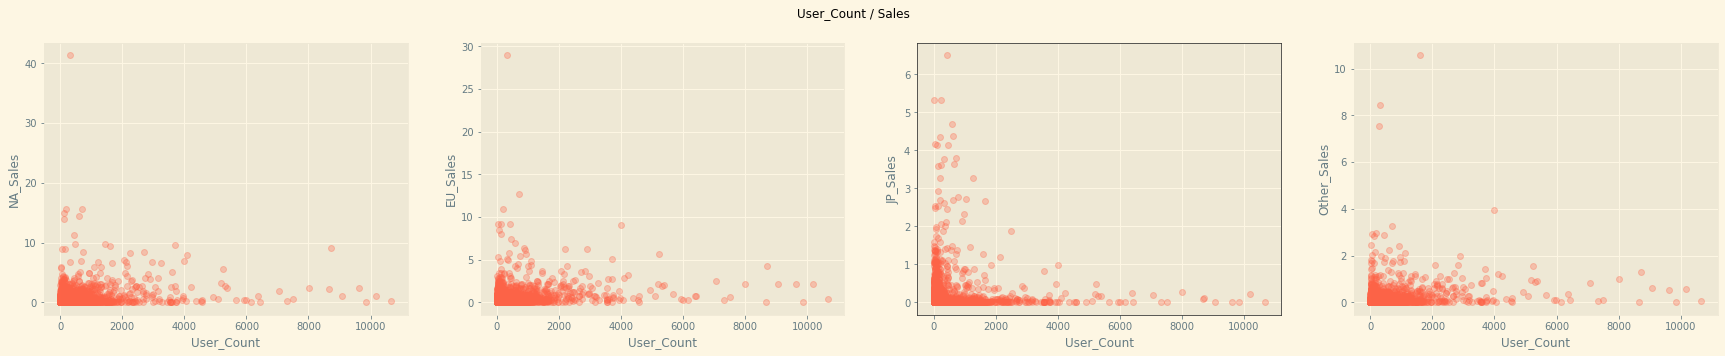

In [ ]:
salesCols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axs = plt.subplots(1, len(salesCols), figsize=(30, 5))
for col, ax in zip(salesCols, axs):
  ax.scatter(dataExt['User_Count'], dataExt[col], alpha=0.3)
  ax.set_ylabel(col)
  ax.set_xlabel('User_Count')

for pos in [ 'bottom', 'top', 'left', 'right']:
  axs[2].spines[pos].set(color='0.2')

fig.suptitle('User_Count / Sales')
plt.show()

4. Games most reviewed by users have high critic scores.

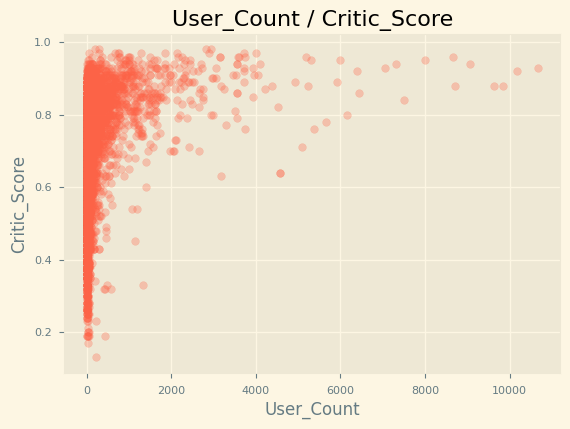

In [ ]:
plt.scatter(dataExt['User_Count'], dataExt['Critic_Score'], alpha=0.3)
plt.title('User_Count / Critic_Score')
plt.ylabel('Critic_Score')
plt.xlabel('User_Count')
plt.show()

5. Relations between User_Score and Critic_Count look similar to relations between Critic_Score and Critic_Count.

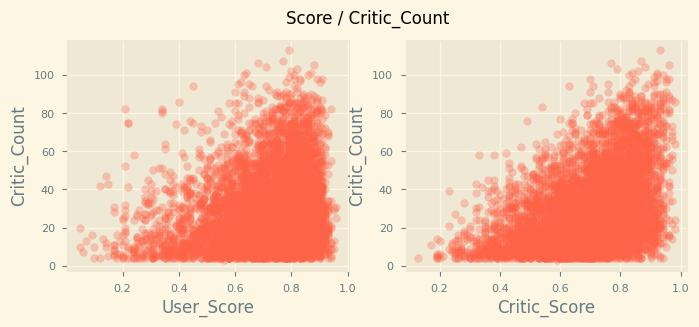

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, col in zip(axs, ['User_Score', 'Critic_Score']):
  ax.scatter(dataExt[col], dataExt['Critic_Count'], alpha=0.3)
  ax.set_ylabel('Critic_Count')
  ax.set_xlabel(col)

fig.suptitle('Score / Critic_Count')
plt.show()

6. Critic_Score and User_Score seem slightly correlated. Histogram shows that there are more User_Scores similar to Critic_Scores especially near the score 0.86. With that point being a center histogram creates nearly eliptical shapes with major axis on the diagonal of the plot. 

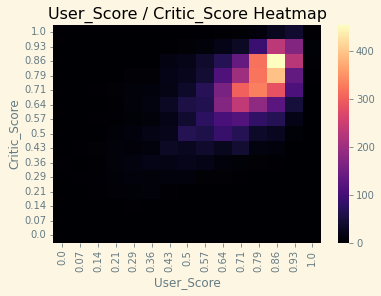

In [ ]:
bins = 15
hist, xedges, yedges = np.histogram2d(dataExt['Critic_Score'], dataExt['User_Score'], bins=bins, range=[[0, 1], [0, 1]])
labels = np.around(np.linspace(0, 1, bins), 2)
hist = pd.DataFrame(hist, index = labels, columns = labels)
hist = hist.reindex(index=hist.index[::-1])

sns.heatmap(hist, cmap='magma')
plt.xlabel('User_Score')
plt.ylabel('Critic_Score')
plt.title('User_Score / Critic_Score Heatmap')
plt.show()

# **Training Models**

In [15]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.tree import export_graphviz
from sklearn.utils import gen_batches
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.callbacks import LearningRateScheduler
from keras.layers import Activation

In [9]:
dataExt = pd.read_csv('processedDataExtended.csv', sep=',', dtype = { column : 'int16' for column in [ 'Year_of_Release', 'Rating', 'Critic_Count', 'User_Count'] })
dataCut = pd.read_csv('processedDataCut.csv', sep=',', dtype = { 'Year_of_Release' : 'int16'})

In [10]:
def createSets(data, XColumns, YColumns):
  
  X = data[XColumns]
  Y = data[YColumns]

  # create dummy columns for cathegorical data
  cathegorical = ['Platform', 'Genre', 'Publisher', 'Developer']
  cathInSetX = list(set(XColumns).intersection(cathegorical))
  cathInSetY = list(set(YColumns).intersection(cathegorical))
  
  if cathInSetX:
    dummy_df = pd.get_dummies(data[cathInSetX])
    X = pd.concat([X, dummy_df], axis=1)
    X = X.drop(cathInSetX, axis=1)

  if cathInSetY:
    dummy_df = pd.get_dummies(data[cathInSetY])
    Y = pd.concat([Y, dummy_df], axis=1)
    Y = Y.drop(cathInSetY, axis=1)

  # split into training and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

  # scale data
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, Y_train, Y_test

In [11]:
def printSummary(modelName, predictedData, expectedData):
  print('========================================')
  print(modelName)
  print('R2: ', metrics.r2_score(expectedData, predictedData))
  print('========================================')

## **Elastic Net Regression**

###  Sales prediction in each region based on numerical values.

In [32]:
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

In [33]:
XCols = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
YCols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [34]:
grid_EN = GridSearchCV(
    make_pipeline(PolynomialFeatures(), ElasticNet(random_state=seed)),
    param_grid={
        'elasticnet__alpha': [0.01, 0.1, 1, 10, 100],
        'polynomialfeatures__degree': [1, 2, 3, 4]
    },
    cv=kfold,
    refit=True)

grid_EN.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(random_state=123))]),
             param_grid={'elasticnet__alpha': [0.01, 0.1, 1, 10, 100],
                         'polynomialfeatures__degree': [1, 2, 3, 4]})

In [29]:
def plotPredictedAndTest(pred, test, ax, title):
  ax.set_title(title)
  x_ax = range( len(Y_pred) )
  ax.plot(x_ax, test, label="original")
  ax.plot(x_ax, pred, label="predicted")
  ax.legend(loc='best',fancybox=True, shadow=True)
  ax.grid(True)

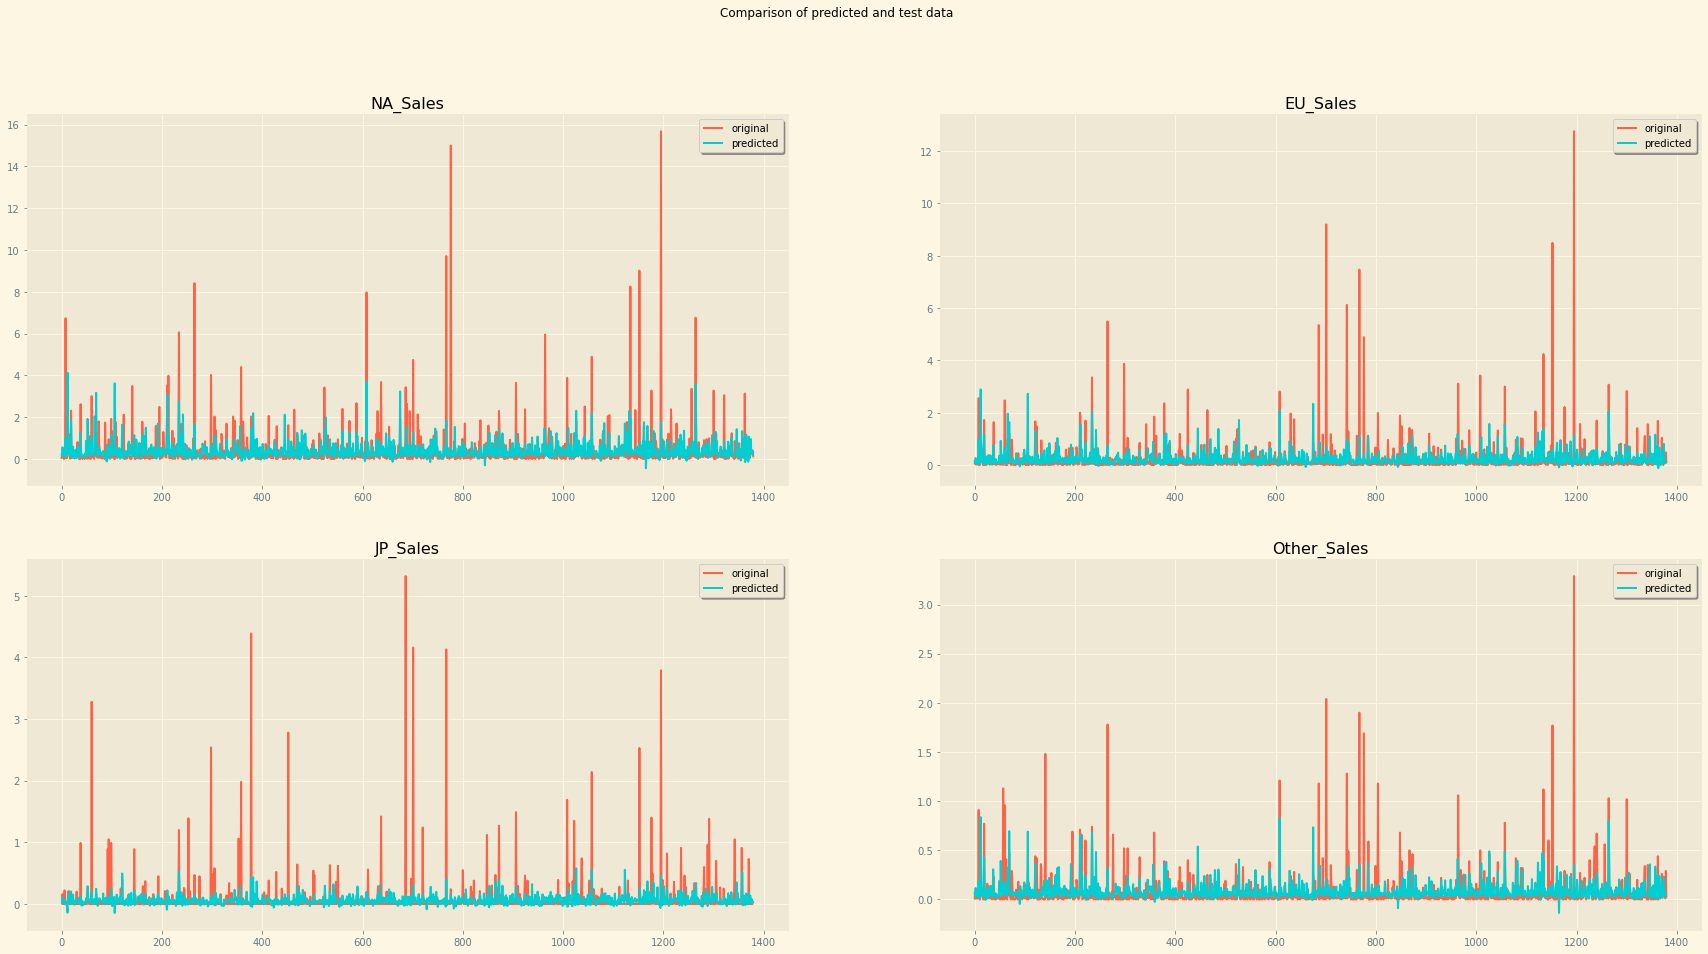

{'elasticnet__alpha': 0.01, 'polynomialfeatures__degree': 2}
Elastic Net
R2:  0.16336623636508524


In [46]:
Y_pred = grid_EN.predict(X_test)
Y_pred = pd.DataFrame(Y_pred, columns=Y_test.columns)

fig, axs = plt.subplots(2, 2, figsize=(30,15))

fig.suptitle("Comparison of predicted and test data")

for col, ax in zip(Y_test.columns, axs.reshape(-1)):
  plotPredictedAndTest(Y_pred[col], Y_test[col], ax, col)

plt.show()
print(grid_EN.best_params_)
printSummary('Elastic Net', Y_pred, Y_test)

### General Sales prediction based on numerical values.

In [67]:
XCols = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
YCols = ['Global_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [48]:
grid_EN = GridSearchCV(
    make_pipeline(PolynomialFeatures(), ElasticNet(random_state=seed)),
    param_grid={
        'elasticnet__alpha': [0.01, 0.1, 1, 10, 100],
        'polynomialfeatures__degree': [1, 2, 3, 4]
    },
    cv=kfold,
    refit=True)

grid_EN.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(random_state=123))]),
             param_grid={'elasticnet__alpha': [0.01, 0.1, 1, 10, 100],
                         'polynomialfeatures__degree': [1, 2, 3, 4]})

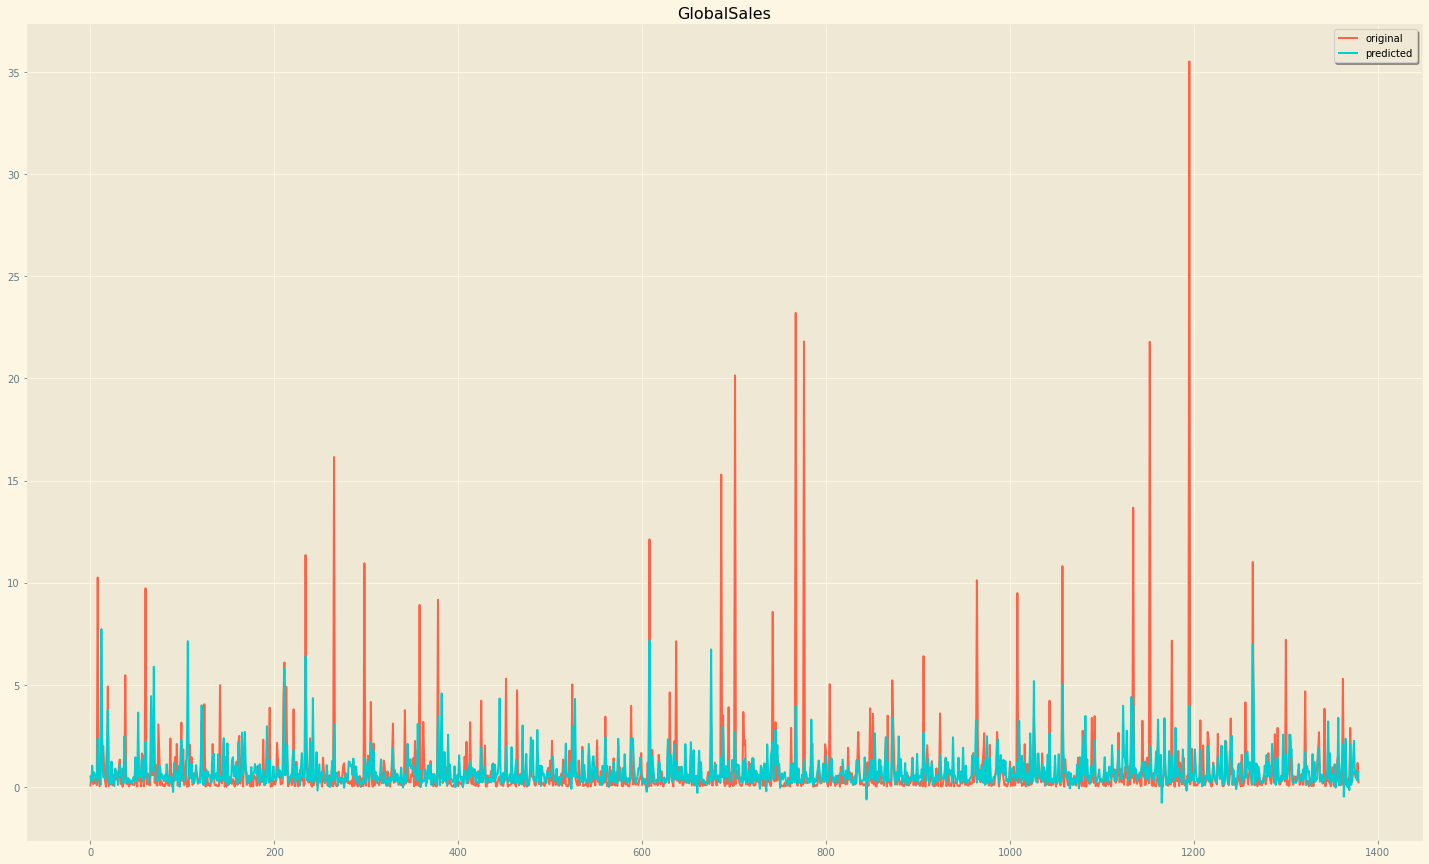

{'elasticnet__alpha': 0.01, 'polynomialfeatures__degree': 2}
Elastic Net
R2:  0.20731587525951578


In [68]:
Y_pred = grid_EN.predict(X_test)

plt.figure(figsize=(25, 15))
ax = plt.subplot()

plt.title("Comparison of predicted and test data")
plotPredictedAndTest(Y_pred, Y_test, ax, 'GlobalSales')
plt.show()

print(grid_EN.best_params_)
printSummary('Elastic Net', Y_pred, Y_test)

## **Elastic Net Regression With Stochastic Gradient Descent**

### Sales prediction using all columns.

Global sales prediction based on all columns including cathegorical data. Due to a high number of columns after encoding cathegorical data training is done in batches.

In [72]:
XCols = ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
YCols = ['Global_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [73]:
X_train.shape

(5519, 1589)

In [75]:
SGDs = []

for alpha in [0.001 ,0.01, 0.1, 1, 10, 100]:
  for batch_size in [10, 100, 1000, 10000]:

    sgd = SGDRegressor(alpha=alpha, penalty='elasticnet')

    #generating batches
    batches = gen_batches(X_train.shape[0], batch_size)
    for batch in batches:
      sgd.partial_fit(X_train[batch], Y_train[batch])
    SGDs.append( (sgd, (alpha, batch_size)) )

EN_SGD = max(SGDs, key = lambda x: x[0].score(X_test, Y_test))  

In [76]:
print('best parameters: ')
print('alpha: ', EN_SGD[1][0])
print('batch size:', EN_SGD[1][1])

best parameters: 
alpha:  1
batch size: 1000


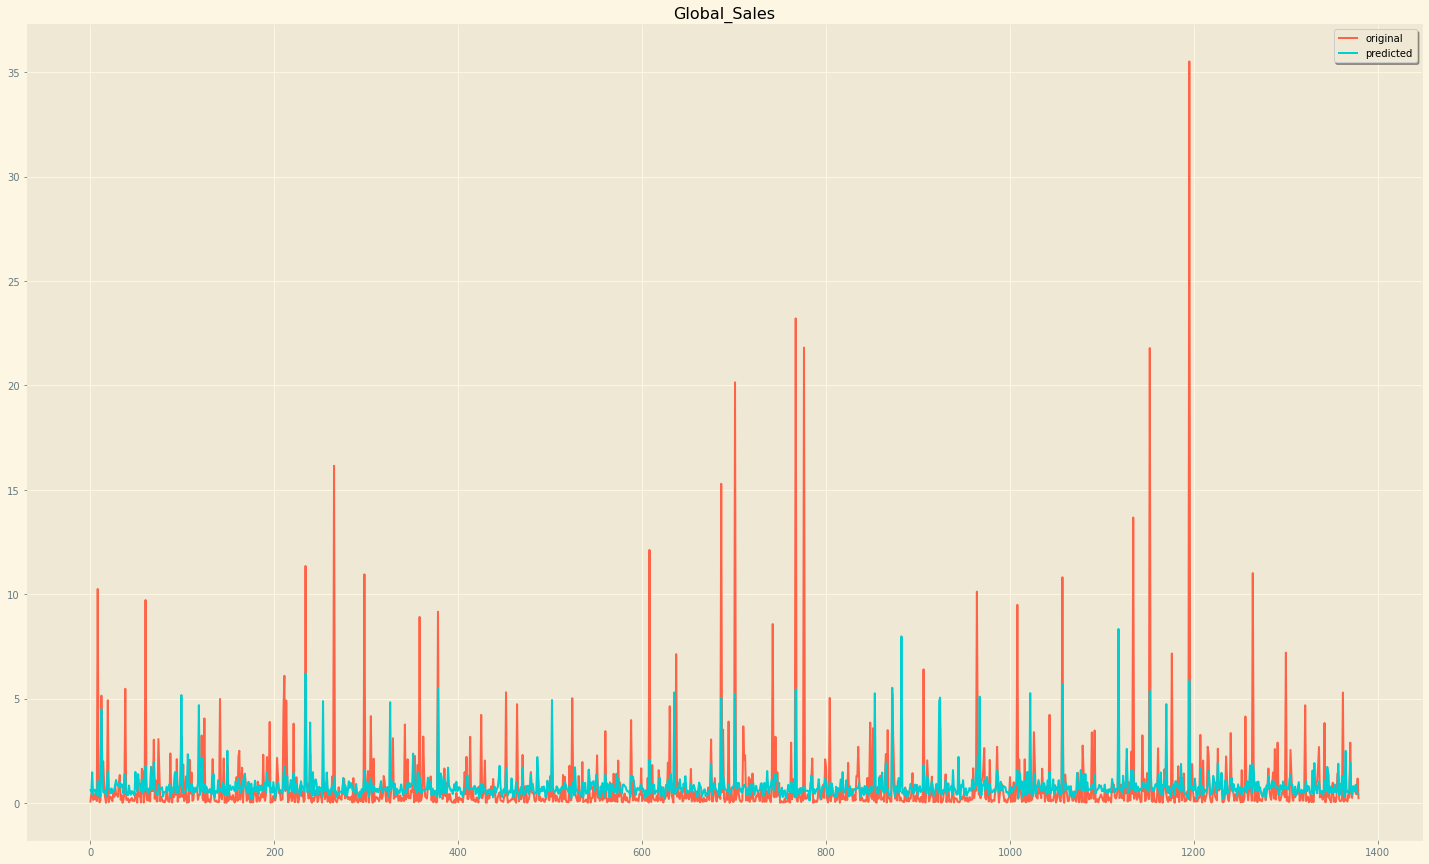

Elastic Net With SGD
R2:  0.22687165410241883


In [77]:
sgd = EN_SGD[0]
Y_pred = sgd.predict(X_test)

plt.figure(figsize=(25, 15))
ax = plt.subplot()

plt.title("Comparison of predicted and test data")
plotPredictedAndTest(Y_pred, Y_test, ax, 'Global_Sales')
plt.show()

printSummary('Elastic Net With SGD', Y_pred, Y_test)

### Sales prediction without columns with high number of unique values.

Because of lower number of columns after encoding cathegorical data it's possible to use polynomial features.

In [78]:
cath = ['Platform', 'Genre', 'Publisher', 'Developer']
for col in cath:
  print(col, len(dataExt[col].unique()))

Platform 17
Genre 12
Publisher 264
Developer 1290


In [79]:
XCols = ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
YCols = ['Global_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [59]:
X_train.shape

(5519, 299)

In [80]:
SGDs = []

for degree in [1, 2]:
  poly = PolynomialFeatures(degree)
  X_train_poly = poly.fit_transform(X_train)

  for alpha in [0.001 ,0.01, 0.1, 1, 10, 100]:
    for batch_size in [10, 100, 1000, 10000]:

      sgd = SGDRegressor(alpha=alpha, penalty='elasticnet')

      #generating batches
      batches = gen_batches(X_train_poly.shape[0], batch_size)
      for batch in batches:
        sgd.partial_fit(X_train_poly[batch], Y_train[batch])

      SGDs.append( (sgd, poly, (alpha, batch_size)) )

EN_SGD = max(SGDs, key = lambda x: x[0].score(x[1].transform(X_test), Y_test))  

In [61]:
print('best parameters: ')
print('degree: ', EN_SGD[1].degree )
print('alpha: ', EN_SGD[2][0])
print('batch size:', EN_SGD[2][1])

best parameters: 
degree:  1
alpha:  1
batch size: 10000


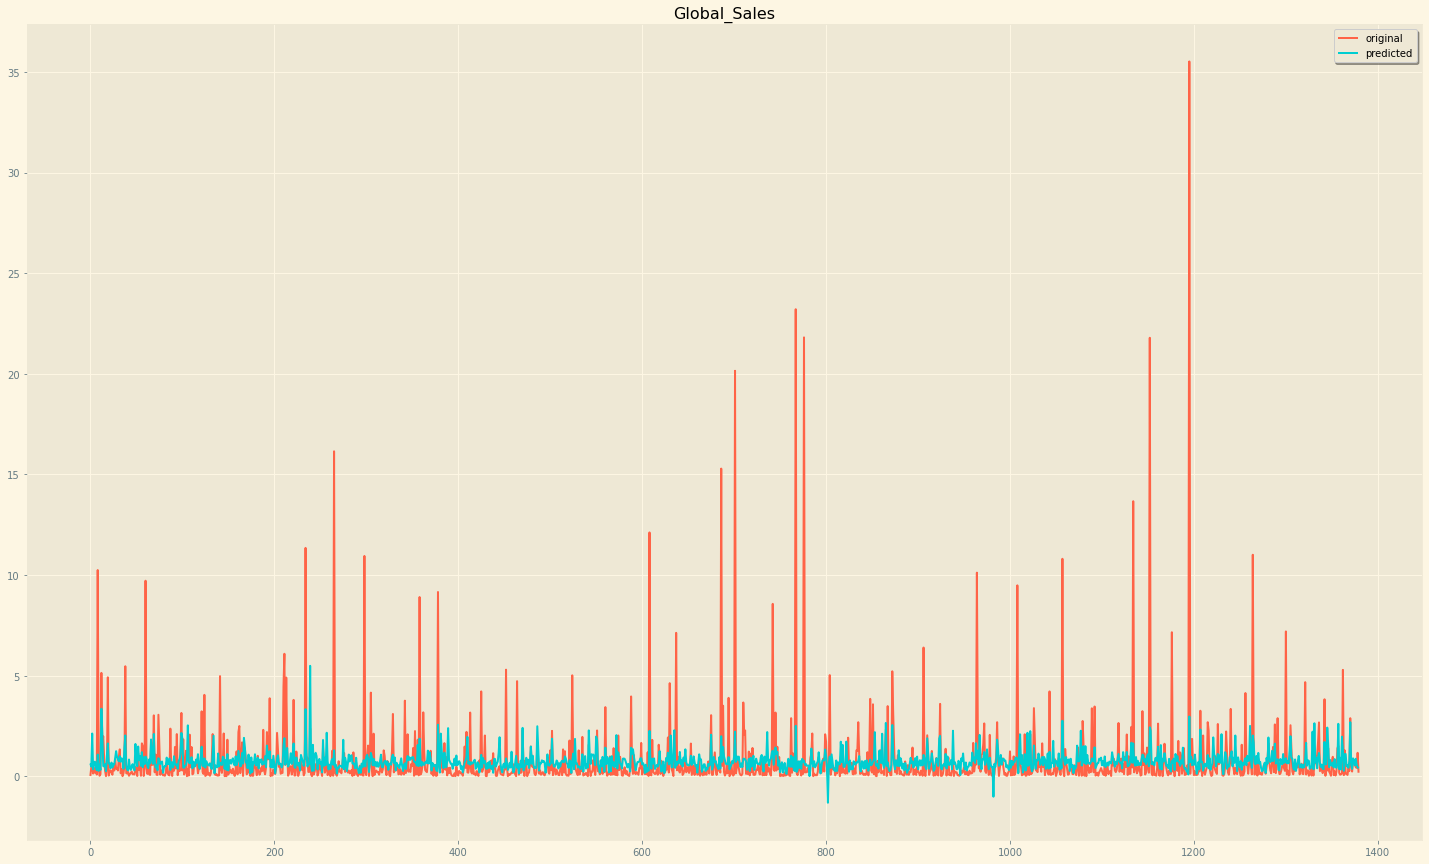

Elastic Net With SGD
R2:  0.14110848402592557


In [81]:
sgd = EN_SGD[0]
poly = EN_SGD[1]
Y_pred = sgd.predict(poly.transform(X_test))

plt.figure(figsize=(25, 15))
ax = plt.subplot()

plt.title("Comparison of predicted and test data")
plotPredictedAndTest(Y_pred, Y_test, ax, 'Global_Sales')
plt.show()

printSummary('Elastic Net With SGD', Y_pred, Y_test)

## **SVM Regressor**

### Sales prediction using all columns.

In [90]:
XCols = ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
YCols = ['Global_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [29]:
svr1 = svm.SVR(C=1)
svr1.fit(X_train, Y_train)

SVR(C=1)

In [93]:
svr2 = svm.SVR(C=10)
svr2.fit(X_train, Y_train)

SVR(C=10)

In [97]:
svr3 = svm.SVR(C=0.1)
svr3.fit(X_train, Y_train)

SVR(C=0.1)

In [98]:
svr4 = svm.SVR(C=100)
svr4.fit(X_train, Y_train)

SVR(C=100)

In [99]:
printSummary('SVM Regressor C = 1', svr1.predict(X_test), Y_test)
printSummary('SVM Regressor C = 10', svr2.predict(X_test), Y_test)
printSummary('SVM Regressor C = 0.1', svr3.predict(X_test), Y_test)
printSummary('SVM Regressor C = 100', svr4.predict(X_test), Y_test)

SVM Regressor C = 1
R2:  0.21150416808908135
SVM Regressor C = 10
R2:  0.25533126436476716
SVM Regressor C = 0.1
R2:  0.052584060868048677
SVM Regressor C = 100
R2:  0.33841064398815424


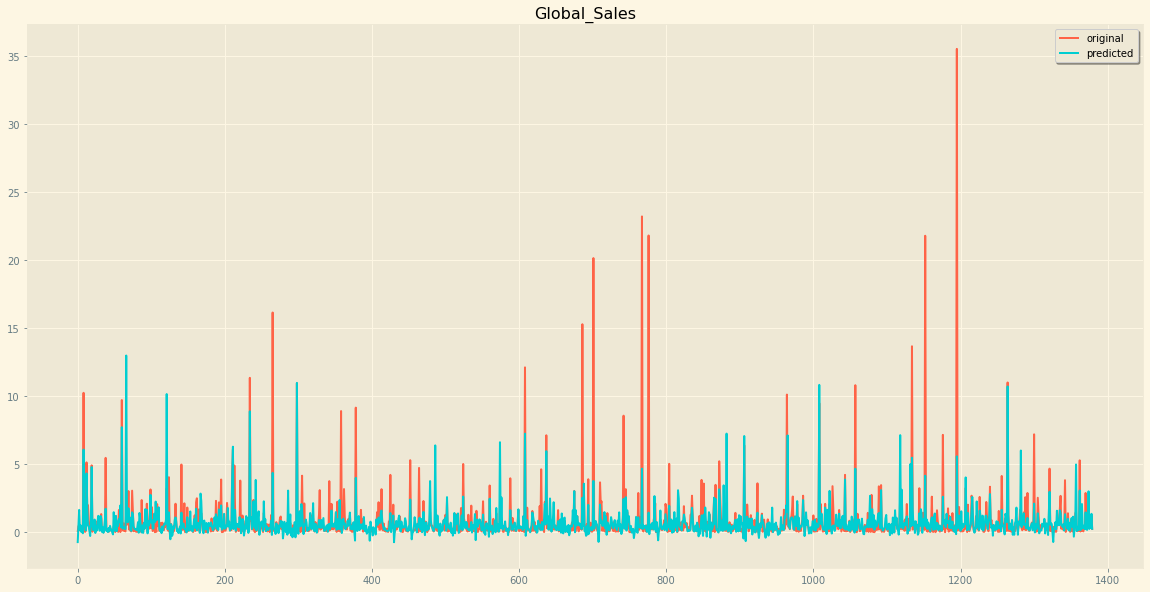

In [100]:
Y_pred = svr4.predict(X_test)

plt.figure(figsize=(20, 10))
ax = plt.subplot()

plt.title("Comparison of predicted and test data")
plotPredictedAndTest(Y_pred, Y_test, ax, 'Global_Sales')
plt.show()

## **SVM Classifier**

### Genre classification

In [101]:
XCols = ['Platform', 'Year_of_Release', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating']

In [102]:
X = dataExt[XCols]
Y = dataExt['Genre']

# create dummy columns for cathegorical data
cathegorical = ['Platform', 'Genre', 'Publisher', 'Developer']
cathInSetX = list(set(XCols).intersection(cathegorical))

if cathInSetX:
  dummy_df = pd.get_dummies(dataExt[cathInSetX])
  X = pd.concat([X, dummy_df], axis=1)
  X = X.drop(cathInSetX, axis=1)

# save class names and replace them with integers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# scale data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
def printSummaryClf(name, clf):
  Y_pred =  clf.predict(X_test)
  print('==========================')
  print(name)
  print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
  print('F1: ', metrics.f1_score(Y_test, Y_pred, average='weighted'))

In [89]:
def showConfusionMatrix(clf, classes):
  Y_pred =  clf.predict(X_test)
  plt.figure(figsize=(12, 10))
  ax = plt.subplot()
  ax.set_title('Confusion Matrix')
  sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot=True, fmt='g', ax=ax, cmap='cividis')
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels');
  cl = label_encoder.inverse_transform(classes)
  ax.xaxis.set_ticklabels(cl)
  ax.yaxis.set_ticklabels(cl)
  plt.show()

In [16]:
clf1 = svm.SVC(decision_function_shape='ovo', kernel='rbf', C=1)
clf1.fit(X_train, Y_train)

SVC(C=1, decision_function_shape='ovo')

In [17]:
clf2 = svm.SVC(decision_function_shape='ovo', kernel='rbf', C=0.01)
clf2.fit(X_train, Y_train)

SVC(C=0.01, decision_function_shape='ovo')

In [18]:
clf3 = svm.SVC(decision_function_shape='ovo', kernel='rbf', C=100)
clf3.fit(X_train, Y_train)

SVC(C=100, decision_function_shape='ovo')

In [55]:
printSummaryClf('SVM C=1', clf1)
printSummaryClf('SVM C=0.01', clf2)
printSummaryClf('SVM C=100', clf3)

SVM C=1
Accuracy:  0.24347826086956523
F1:  0.09670474373488452
SVM C=0.01
Accuracy:  0.24347826086956523
F1:  0.09534813013073884
SVM C=100
Accuracy:  0.24347826086956523
F1:  0.09670474373488452


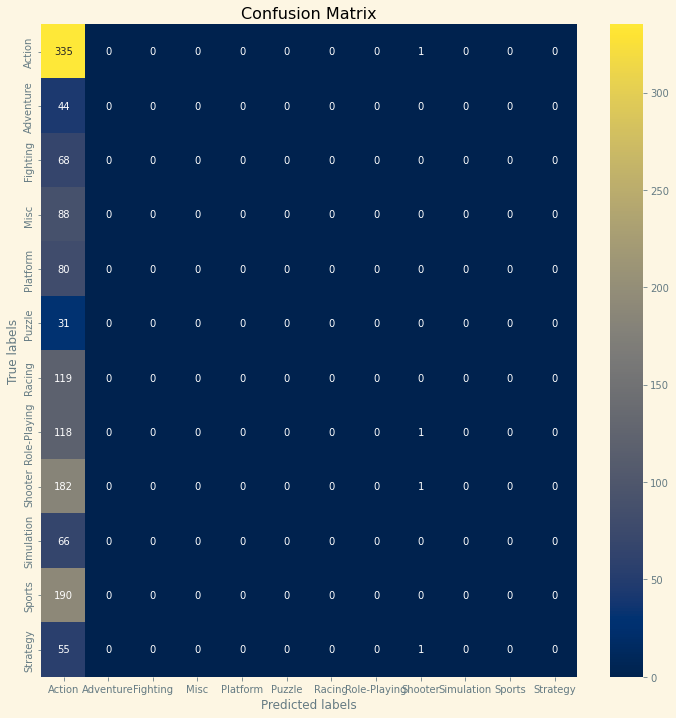

In [64]:
showConfusionMatrix(clf1, clf1.classes_)

SVM with RBF kernel assigned Action genre to nearly every game.
Trying linear kernel:

In [9]:
clf4 = svm.SVC(decision_function_shape='ovo', kernel='linear', C=1)
clf4.fit(X_train, Y_train)

SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [22]:
clf5 = svm.SVC(decision_function_shape='ovo', kernel='linear', C=10)
clf5.fit(X_train, Y_train)

SVC(C=10, decision_function_shape='ovo', kernel='linear')

In [23]:
printSummaryClf('SVM Linear C=1', clf4)
printSummaryClf('SVM Linear C=10', clf5)

SVM Linear C=1
Accuracy:  0.413768115942029
F1:  0.37563230343865817
SVM Linear C=10
Accuracy:  0.4115942028985507
F1:  0.3683878416437055


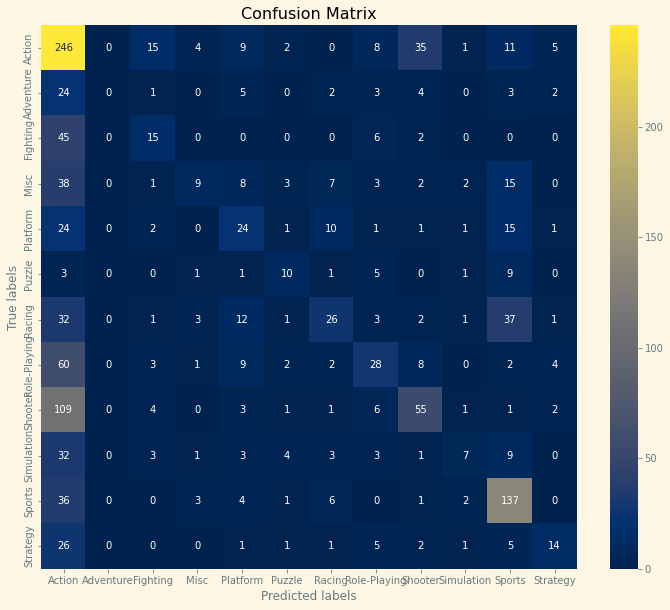

In [24]:
showConfusionMatrix(clf4, clf4.classes_)

## **Random Forests**

### Genre Classification

In [103]:
RFclf = RandomForestClassifier(n_estimators=300, criterion="entropy", n_jobs=-1 )  
RFclf.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=300, n_jobs=-1)

Random Forests
Accuracy:  0.4797101449275362
F1:  0.4521766815013247


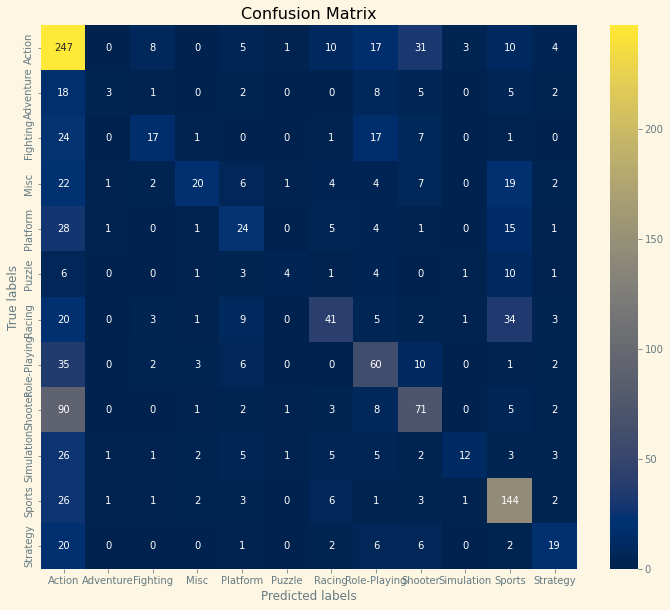

In [104]:
printSummaryClf('Random Forests', RFclf)
showConfusionMatrix(RFclf, RFclf.classes_)

Visualisation of one of decision trees

In [105]:
export_graphviz(
        RFclf.estimators_[0],
        out_file="./randomForest.dot",
        feature_names=X_train.columns,
        class_names = label_encoder.classes_,
        rounded=True,
        filled=True
    )

In [106]:
!dot -Tpng randomForest.dot -o randomForest.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134088 to fit


## **Neural Networks**

### Sales prediction

In [23]:
XCols = ['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
YCols = ['Global_Sales']

X_train, X_test, Y_train, Y_test = createSets(dataExt, XCols, YCols)

In [43]:
X_train.shape

(5519, 1589)

In [73]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate
  
lrate = LearningRateScheduler(step_decay)

In [77]:
history = History()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model = Sequential()

model.add(Dense(5519, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(250, use_bias=False))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss="mean_squared_error", optimizer="Adam", metrics=["mse"])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 5519)              8769691   
                                                                 
 dropout_71 (Dropout)        (None, 5519)              0         
                                                                 
 batch_normalization_71 (Bat  (None, 5519)             22076     
 chNormalization)                                                
                                                                 
 activation_71 (Activation)  (None, 5519)              0         
                                                                 
 dense_75 (Dense)            (None, 1000)              5519000   
                                                                 
 dropout_72 (Dropout)        (None, 1000)              0         
                                                     

In [78]:
history2 = model.fit(X_train, Y_train, validation_data= (X_test, Y_test), batch_size=32,epochs=20, callbacks=[early_stopping, lrate, history])

Epoch 1/20
173/173 [==============================] - 23s 123ms/step - loss: 3.3515 - mse: 3.3515 - val_loss: 3.1560 - val_mse: 3.1560 - lr: 0.0100
Epoch 2/20
173/173 [==============================] - 21s 121ms/step - loss: 2.9748 - mse: 2.9748 - val_loss: 3.5254 - val_mse: 3.5254 - lr: 0.0100
Epoch 3/20
173/173 [==============================] - 21s 121ms/step - loss: 2.8081 - mse: 2.8081 - val_loss: 2.8724 - val_mse: 2.8724 - lr: 0.0100
Epoch 4/20
173/173 [==============================] - 21s 120ms/step - loss: 2.7472 - mse: 2.7472 - val_loss: 2.5886 - val_mse: 2.5886 - lr: 0.0100
Epoch 5/20
173/173 [==============================] - 22s 127ms/step - loss: 2.5805 - mse: 2.5805 - val_loss: 3.0526 - val_mse: 3.0526 - lr: 0.0100
Epoch 6/20
173/173 [==============================] - 27s 155ms/step - loss: 2.8091 - mse: 2.8091 - val_loss: 2.8872 - val_mse: 2.8872 - lr: 0.0100
Epoch 7/20
173/173 [==============================] - 25s 147ms/step - loss: 2.6060 - mse: 2.6060 - val_loss: 2.

Network
R2:  0.5145810230417833


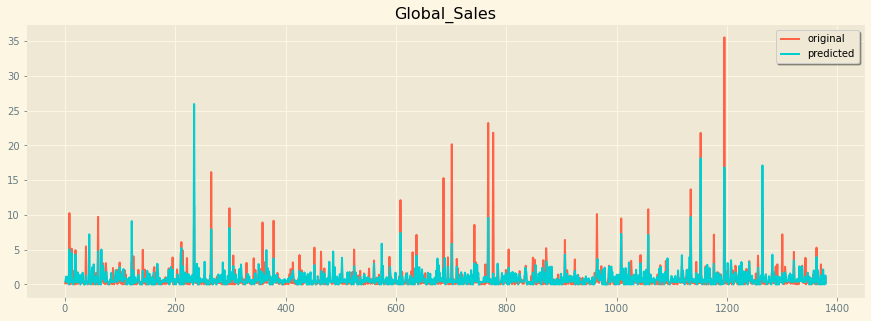

In [79]:
Y_pred = model.predict(X_test)
printSummary('Network', Y_pred, Y_test)

plt.figure(figsize=(15, 5))
ax = plt.subplot()
plotPredictedAndTest(Y_pred, Y_test, ax, 'Global_Sales')
plt.show()

### Genre classification

In [81]:
XCols = ['Platform', 'Year_of_Release', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating']

In [82]:
X = dataExt[XCols]
Y = dataExt['Genre']

# create dummy columns for cathegorical data
cathegorical = ['Platform', 'Genre', 'Publisher', 'Developer']
cathInSetX = list(set(XCols).intersection(cathegorical))

if cathInSetX:
  dummy_df = pd.get_dummies(dataExt[cathInSetX])
  X = pd.concat([X, dummy_df], axis=1)
  X = X.drop(cathInSetX, axis=1)

# create dummy columns for cathegorical data
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

dummy_df = pd.get_dummies(dataExt[cathInSetX])
X = pd.concat([X, dummy_df], axis=1)
X = X.drop(cathInSetX, axis=1)

# split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# scale data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
history = History()
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model = Sequential()

model.add(Dense(5519, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))

model.add(Dense(1000, use_bias=False))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))

model.add(Dense(len(label_encoder.classes_)))
model.add(BatchNormalization())
model.add(Activation("softmax"))

model.compile(optimizer="Adam",
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=[keras.metrics.SparseCategoricalAccuracy()]
  )
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 5519)              1611548   
                                                                 
 dropout_78 (Dropout)        (None, 5519)              0         
                                                                 
 batch_normalization_81 (Bat  (None, 5519)             22076     
 chNormalization)                                                
                                                                 
 activation_82 (Activation)  (None, 5519)              0         
                                                                 
 dense_86 (Dense)            (None, 1000)              5519000   
                                                                 
 dropout_79 (Dropout)        (None, 1000)              0         
                                                     

In [94]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test), batch_size=32, epochs=100, callbacks=[early_stopping, history, lrate])

Epoch 1/100
173/173 [==============================] - 14s 77ms/step - loss: 2.3836 - sparse_categorical_accuracy: 0.1796 - val_loss: 2.2549 - val_sparse_categorical_accuracy: 0.2522 - lr: 0.0100
Epoch 2/100
173/173 [==============================] - 13s 75ms/step - loss: 2.2171 - sparse_categorical_accuracy: 0.2390 - val_loss: 2.2274 - val_sparse_categorical_accuracy: 0.2428 - lr: 0.0100
Epoch 3/100
173/173 [==============================] - 13s 76ms/step - loss: 2.1854 - sparse_categorical_accuracy: 0.2625 - val_loss: 2.2346 - val_sparse_categorical_accuracy: 0.2333 - lr: 0.0100
Epoch 4/100
173/173 [==============================] - 13s 76ms/step - loss: 2.1408 - sparse_categorical_accuracy: 0.2803 - val_loss: 2.1596 - val_sparse_categorical_accuracy: 0.3297 - lr: 0.0100
Epoch 5/100
173/173 [==============================] - 13s 76ms/step - loss: 2.0984 - sparse_categorical_accuracy: 0.2943 - val_loss: 2.1514 - val_sparse_categorical_accuracy: 0.2514 - lr: 0.0100
Epoch 6/100
173/173 

In [105]:
# converting one encoded values to an integer
Y_pred = model.predict(X_test)
Y_pred = list(map(np.argmax, Y_pred))

In [106]:
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
print('F1: ', metrics.f1_score(Y_test, Y_pred, average='weighted'))

Accuracy:  0.3456521739130435
F1:  0.2338522678635179


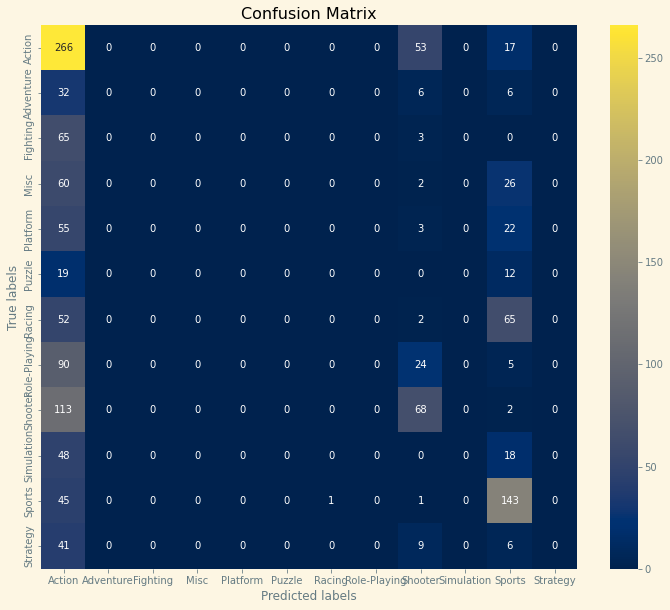

In [109]:
plt.figure(figsize=(12, 10))
ax = plt.subplot()
ax.set_title('Confusion Matrix')
sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot=True, fmt='g', ax=ax, cmap='cividis')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
cl = label_encoder.inverse_transform(range(12))
ax.xaxis.set_ticklabels(cl)
ax.yaxis.set_ticklabels(cl)
plt.show()